## PyTorch Custom Dataset

### Importing a PyTorch and setting up device-agnostic code

In [3]:
import torch
from torch import nn

In [4]:
torch.__version__

'2.6.0+cu124'

In [5]:
# Set up device-agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [6]:
device

'cuda'

In [7]:
!nvidia-smi

Tue Apr 29 02:53:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
# Pushing and pulling project into and from github
!git config --global user.name "Asliddin"
!git config --global user.email "asliddinmalikov999@gmail.com"


In [9]:
!git clone https://github.com/tayfunai/PytorchPractise.git

Cloning into 'PytorchPractise'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 7), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 941.33 KiB | 2.98 MiB/s, done.
Resolving deltas: 100% (7/7), done.


### 1. Get data
* Dataset I am going to work on is subset of Food101 dataset
* I am using just 3 classes of food out of 101 different categories in actual dataset
* My dataset is 10 percent of Food101 dataset images.

In [10]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

# This piece of code is to prevent redownloading dataset if it's already exist
if image_path.is_dir():
  print(f" {image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, so creating a new one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
  print(f"Downloading dataset from github...")
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

# Unzip dataset
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_file:
  print(f"Unzipping dataset...")
  zip_file.extractall(image_path)

data/pizza_steak_sushi does not exist, so creating a new one...
Unzipping dataset...


In [11]:
image_path

PosixPath('data/pizza_steak_sushi')

In [12]:
!cp -r /content/data /content/PytorchPractise

In [13]:
!cp -r /content/data /content/PytorchPractise

In [14]:
!git clone https://github.com/tayfunai/PytorchPractise.git

fatal: destination path 'PytorchPractise' already exists and is not an empty directory.


### 2. Becoming one with the data (data preparation and data exploration)

#### Following folder structure is standard dataset format for computer vision projects
```
pizza_steak_sushi/ <- overall dataset folder
    train/ <- training images
        pizza/ <- class name as folder name
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- testing images
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...
```





In [15]:
# Once downloading dataset we will explore it by walking through each subfolders using os.walk()
import os
def walk_through_dir(dir_path):
  """
    Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  print(dir_path)
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(dir_path)
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [16]:
walk_through_dir(image_path)

data/pizza_steak_sushi
data/pizza_steak_sushi
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
data/pizza_steak_sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
data/pizza_steak_sushi
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
data/pizza_steak_sushi
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
data/pizza_steak_sushi
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
data/pizza_steak_sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
data/pizza_steak_sushi
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
data/pizza_steak_sushi
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
data/pizza_steak_sushi
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [17]:
image_path

PosixPath('data/pizza_steak_sushi')

In [18]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [19]:
walk_through_dir(image_path)
img_path = image_path

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [20]:
# Setup training and test paths
train_dir = img_path/"train"
test_dir = img_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Image Visualization

In [21]:
import random
from PIL import Image

# set seed
random.seed(42)

# 1. Getting all image paths
img_path_list = list(img_path.glob("*/*/*.jpg"))

In [22]:
random_image_path = random.choice(img_path_list)

In [23]:
random_image_path

PosixPath('data/pizza_steak_sushi/train/sushi/121940.jpg')

In [24]:
# 3. Get image class from image path name
image_class = random_image_path.parent.stem
image_class

'sushi'

In [25]:
import torchvision
torch_img = torchvision.io.read_image(str(random_image_path))

Random image path: data/pizza_steak_sushi/train/sushi/121940.jpg
Image class: sushi
Image height: 382
Image width: 512


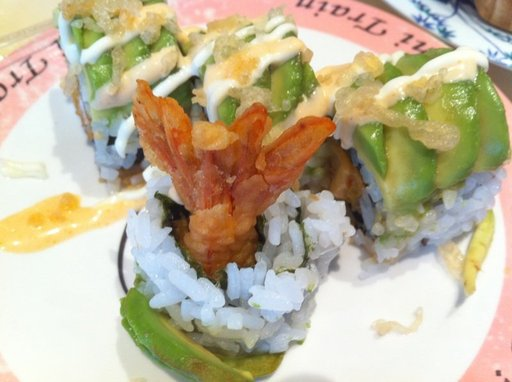

In [26]:
# Open image
PILImg = Image.open(random_image_path)

# Print image metadeta
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {PILImg.height}")
print(f"Image width: {PILImg.width}")
PILImg

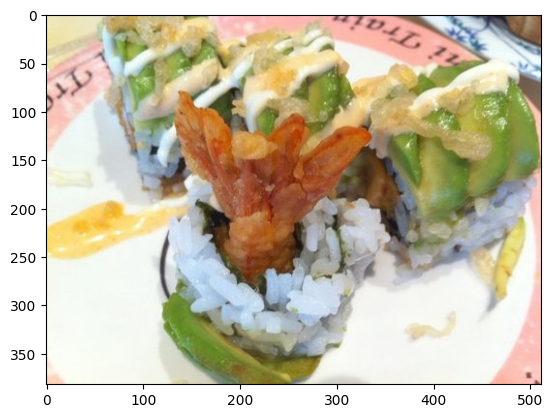

In [27]:
# Visualiza an image with matplotlib
import matplotlib.pyplot as plt
img = plt.imread(random_image_path)
plt.imshow(img)

### 3. Transofrming data into pytorch tensors


In [28]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [29]:
### 1. Transofrming data with torchvision.transforms
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our image to 64x64
    transforms.Resize(size=(64,64)),
    # Flipping the images horizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Trun the image into a tensor
    transforms.ToTensor()
])

In [30]:
data_transform(PILImg).shape

torch.Size([3, 64, 64])

### 4. Visualizing transformed images

In [35]:
def plot_transformed_images(img_path_list, transform, n=3, seed=42):
  """ Selects n number of random images from images
      loads and transfforms them and then plot original
      and transformed images
  """
  random_img_paths = random.sample(img_path_list, k=n)
  for img_path in random_img_paths:
    with Image.open(img_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")

      # Transform the image
      transformed_img = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed\nSize: {transformed_img.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {img_path.parent.stem}")

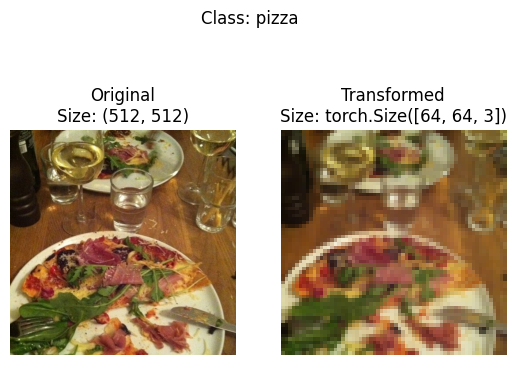

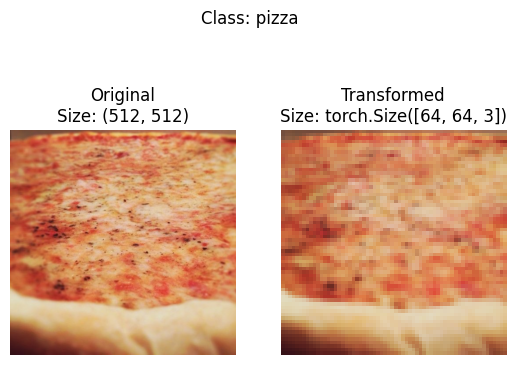

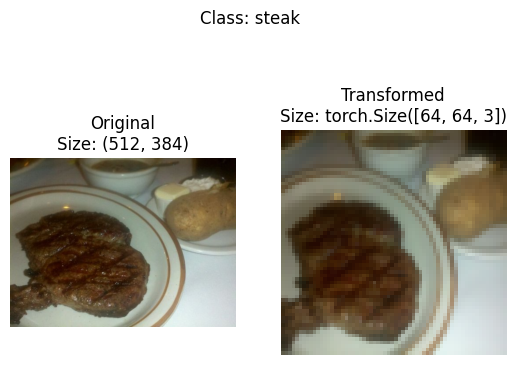

In [42]:
plot_transformed_images(
    img_path_list=img_path_list,
    transform=data_transform,
    n=3,
    seed=43
)

### 4. Option 1: Loading image data using `ImageFolder`
I can load image classification data using `torchvision.datasets.ImageFolder`

In [43]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

In [44]:
test_data, train_data

(Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [45]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [47]:
# get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [49]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [50]:
# check the lenght of dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
test_data.targets

### Visualizing loaded image data from a train_data

In [53]:
img, label = train_data[0][0], train_data[0][1]

In [55]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [57]:
class_names[label]

'pizza'

In [58]:
print(f"Image tensors:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Label datatype: {type(label)}")
print(f"Class: {class_names[label]}")

Image tensors:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, weight]
Image permute: torch.Size([64, 64, 3]) -> [height, weight, color_channels]


Text(0.5, 1.0, 'pizza')

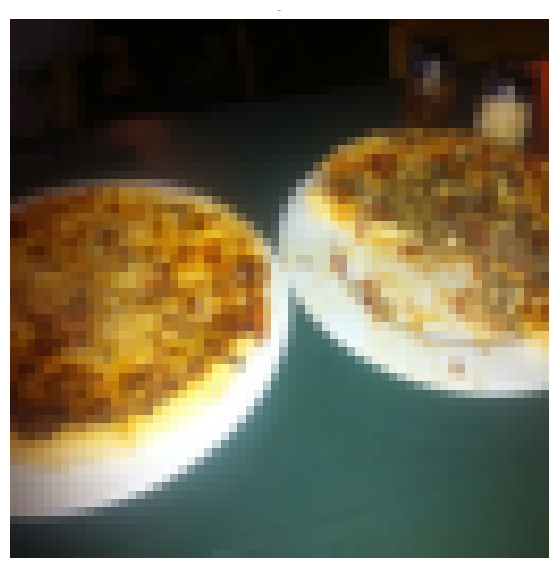

In [59]:
# rearrange the order demensions
img_permute = img.permute(1, 2, 0)

#Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, weight]")
print(f"Image permute: {img_permute.shape} -> [height, weight, color_channels]")


# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=1)

### 4. Trun loaded images into `DataLoader`

In [62]:
import os
os.cpu_count()

2

In [70]:
#Turn train and test datasets into Dataloaders
BATCH_SIZE = 32
trainDataLoader = DataLoader(dataset=train_data,
        batch_size=BATCH_SIZE, shuffle=True,
                             num_workers=os.cpu_count())
testDataLoader = DataLoader(dataset=test_data,
        batch_size=BATCH_SIZE, shuffle=False,
                             num_workers=os.cpu_count())

In [71]:
trainDataLoader, testDataLoader

(<torch.utils.data.dataloader.DataLoader at 0x7a7a905fead0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a7a905fced0>)

In [72]:
image, label = next(iter(trainDataLoader))

In [73]:
print(f"Image shape: {image.shape} -> [batch_size, color_channels, height, weight]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, weight]
Label shape: torch.Size([32])


### 5 Custom ImageFolder function
Loading image data with custom dataset


In [74]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [81]:
# Set up a pth for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

Target dir: data/pizza_steak_sushi/train


In [79]:
class_names_found

['pizza', 'steak', 'sushi']

In [83]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'steak'>, <DirEntry 'pizza'>]

In [88]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ finds the class folder names in a target directory
      by scanning target directory
  """
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [87]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})